les importations nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


In [2]:
data_A=pd.read_csv('/content/Scenario-A-merged_5s.csv')

Importation des données

In [3]:
data_A.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


Data check

In [6]:
data_A.shape

(84194, 29)

In [4]:
data_A.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

Data pre processing

In [7]:
data_A.isnull().sum()

,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Protocol,0
Flow Duration,0
Flow Bytes/s,2
Flow Packets/s,0
Flow IAT Mean,0
Flow IAT Std,0


on voit bien qu'il y a deux valuers manquantes à gérer

In [8]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84194 entries, 0 to 84193
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source IP          84194 non-null  object 
 1    Source Port       84194 non-null  int64  
 2    Destination IP    84194 non-null  object 
 3    Destination Port  84194 non-null  int64  
 4    Protocol          84194 non-null  int64  
 5    Flow Duration     84194 non-null  int64  
 6    Flow Bytes/s      84192 non-null  float64
 7    Flow Packets/s    84194 non-null  float64
 8    Flow IAT Mean     84194 non-null  float64
 9    Flow IAT Std      84194 non-null  float64
 10   Flow IAT Max      84194 non-null  int64  
 11   Flow IAT Min      84194 non-null  int64  
 12  Fwd IAT Mean       84194 non-null  float64
 13   Fwd IAT Std       84194 non-null  float64
 14   Fwd IAT Max       84194 non-null  int64  
 15   Fwd IAT Min       84194 non-null  int64  
 16  Bwd IAT Mean       841

In [9]:
data_A.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,84194.000000,84194.000000,84194.000000,8.419400e+04,8.419200e+04,8.419400e+04,8.419400e+04,8.419400e+04,8.419400e+04,8.419400e+04,...,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04
mean,36548.661686,13160.683802,11.709041,1.976443e+06,inf,inf,2.345857e+05,1.060288e+05,5.085555e+05,1.692679e+05,...,2.699017e+05,3.730249e+04,1.879716e+04,0.0,1.879716e+04,1.879716e+04,1.585213e+05,0.0,1.585213e+05,1.585213e+05
std,21514.574423,19549.475949,5.496059,2.143432e+06,NaN,NaN,5.300413e+05,2.847677e+05,8.607729e+05,5.012712e+05,...,6.769662e+05,2.460999e+05,1.437066e+05,0.0,1.437066e+05,1.437066e+05,7.603776e+05,0.0,7.603776e+05,7.603776e+05
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.110615e+05,1.068141e+02,4.874711e+00,9.873663e+03,0.000000e+00,3.537575e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,42381.000000,443.000000,17.000000,4.207625e+05,1.952058e+03,2.966216e+01,4.652450e+04,3.953863e+03,1.556870e+05,4.930000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838636e+06,2.596406e+04,1.040035e+02,3.334988e+05,4.637779e+04,4.427632e+05,1.358822e+05,...,1.216798e+05,4.400000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,inf,inf,5.000000e+06,3.535258e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,4.998709e+06,2.447136e+06,0.0,2.447136e+06,2.447136e+06,5.000000e+06,0.0,5.000000e+06,5.000000e+06


pareil on voit des valeurs ifins à gérer

on remplacera les valeurs infinies

In [10]:
data_A.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
data_A.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,84194.000000,84194.000000,84194.000000,8.419400e+04,8.418700e+04,8.418700e+04,8.419400e+04,8.419400e+04,8.419400e+04,8.419400e+04,...,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04
mean,36548.661686,13160.683802,11.709041,1.976443e+06,2.693915e+05,2.767573e+03,2.345857e+05,1.060288e+05,5.085555e+05,1.692679e+05,...,2.699017e+05,3.730249e+04,1.879716e+04,0.0,1.879716e+04,1.879716e+04,1.585213e+05,0.0,1.585213e+05,1.585213e+05
std,21514.574423,19549.475949,5.496059,2.143432e+06,5.147994e+06,4.374423e+04,5.300413e+05,2.847677e+05,8.607729e+05,5.012712e+05,...,6.769662e+05,2.460999e+05,1.437066e+05,0.0,1.437066e+05,1.437066e+05,7.603776e+05,0.0,7.603776e+05,7.603776e+05
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.110615e+05,1.068137e+02,4.874708e+00,9.873663e+03,0.000000e+00,3.537575e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,42381.000000,443.000000,17.000000,4.207625e+05,1.951995e+03,2.963630e+01,4.652450e+04,3.953863e+03,1.556870e+05,4.930000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838636e+06,2.595854e+04,1.039026e+02,3.334988e+05,4.637779e+04,4.427632e+05,1.358822e+05,...,1.216798e+05,4.400000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,6.000000e+08,3.000000e+06,5.000000e+06,3.535258e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,4.998709e+06,2.447136e+06,0.0,2.447136e+06,2.447136e+06,5.000000e+06,0.0,5.000000e+06,5.000000e+06


In [12]:
data_A.isna().sum()

,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Protocol,0
Flow Duration,0
Flow Bytes/s,7
Flow Packets/s,7
Flow IAT Mean,0
Flow IAT Std,0


In [13]:
data_A[" Flow Bytes/s"].fillna(data_A[" Flow Bytes/s"].median(), inplace=True)

<ipython-input-13-031646c65fe2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_A[" Flow Bytes/s"].fillna(data_A[" Flow Bytes/s"].median(), inplace=True)


In [14]:
data_A[" Flow Packets/s"].fillna(data_A[" Flow Packets/s"].median(), inplace=True)

<ipython-input-14-90554579ee68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_A[" Flow Packets/s"].fillna(data_A[" Flow Packets/s"].median(), inplace=True)


In [15]:
data_A.isna().sum()

,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Protocol,0
Flow Duration,0
Flow Bytes/s,0
Flow Packets/s,0
Flow IAT Mean,0
Flow IAT Std,0


on vérifie la répartition des còasses

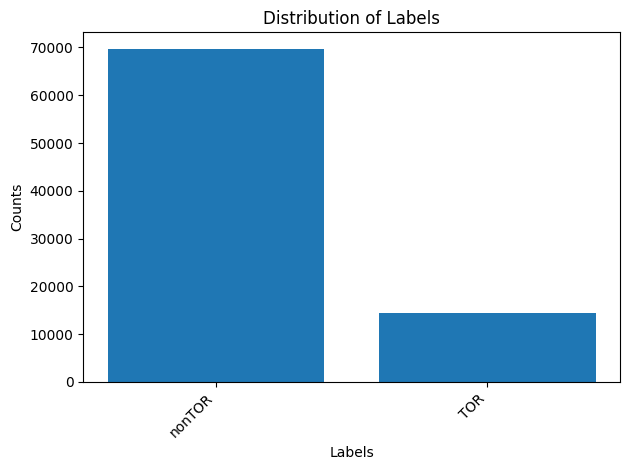

In [17]:
import matplotlib.pyplot as plt

label_counts = data_A["label"].value_counts()
labels = label_counts.index
heights = label_counts.values

plt.bar(labels, heights)
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Distribution of Labels")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

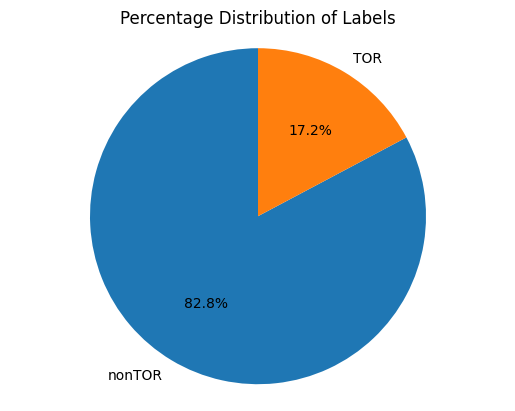

In [18]:
import matplotlib.pyplot as plt

label_counts = data_A["label"].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Percentage Distribution of Labels")

plt.axis('equal')

plt.show()

les données sont déséquilibrés donc on va pas s'appuer sur l'accuracy comme métrique d'évaluation

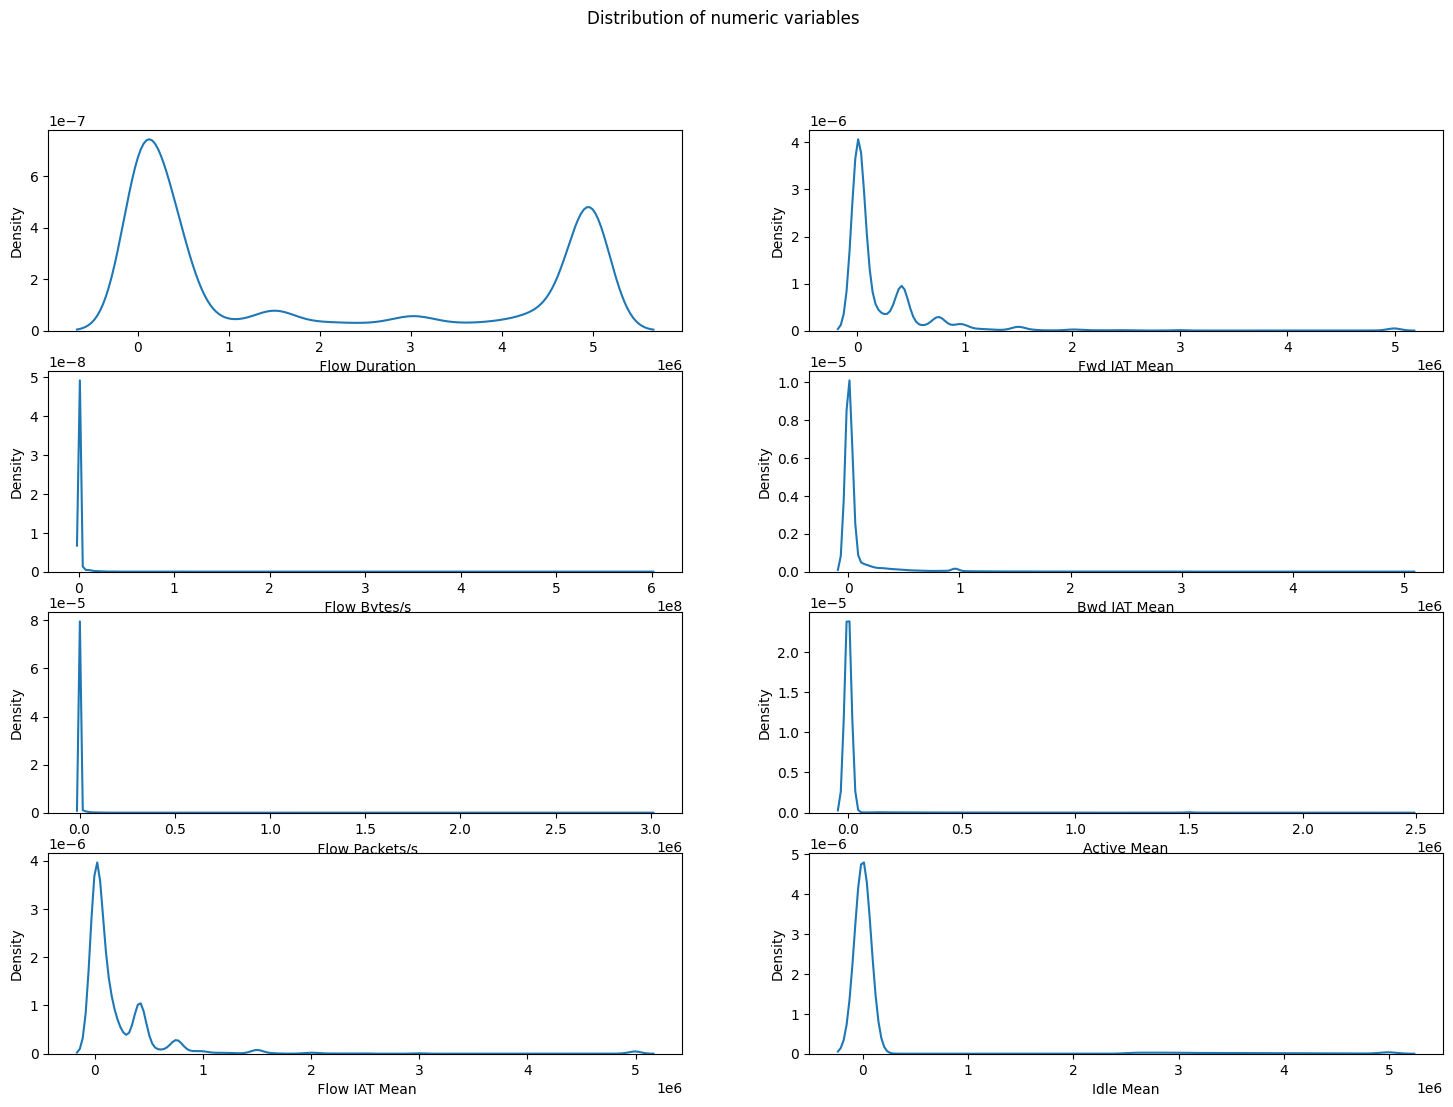

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))

sns.kdeplot(ax=ax[0,0], x=data_A[' Flow Duration'])
sns.kdeplot(ax=ax[1,0], x=data_A[' Flow Bytes/s'])
sns.kdeplot(ax=ax[2,0], x=data_A[' Flow Packets/s'])
sns.kdeplot(ax=ax[3,0], x=data_A[' Flow IAT Mean'])
sns.kdeplot(ax=ax[0, 1], x=data_A['Fwd IAT Mean'])
sns.kdeplot(ax=ax[1, 1], x=data_A['Bwd IAT Mean'])
sns.kdeplot(ax=ax[2, 1], x=data_A['Active Mean'])
sns.kdeplot(ax=ax[3, 1], x=data_A['Idle Mean'])

fig.suptitle("Distribution of numeric variables")
plt.savefig('scenarioA_num_variables.png', bbox_inches='tight')

vérifions les types de données

In [21]:
data_A.dtypes

,0
Source IP,object
Source Port,int64
Destination IP,object
Destination Port,int64
Protocol,int64
Flow Duration,int64
Flow Bytes/s,float64
Flow Packets/s,float64
Flow IAT Mean,float64
Flow IAT Std,float64


vérifions la normalité de données avec des QQ plots

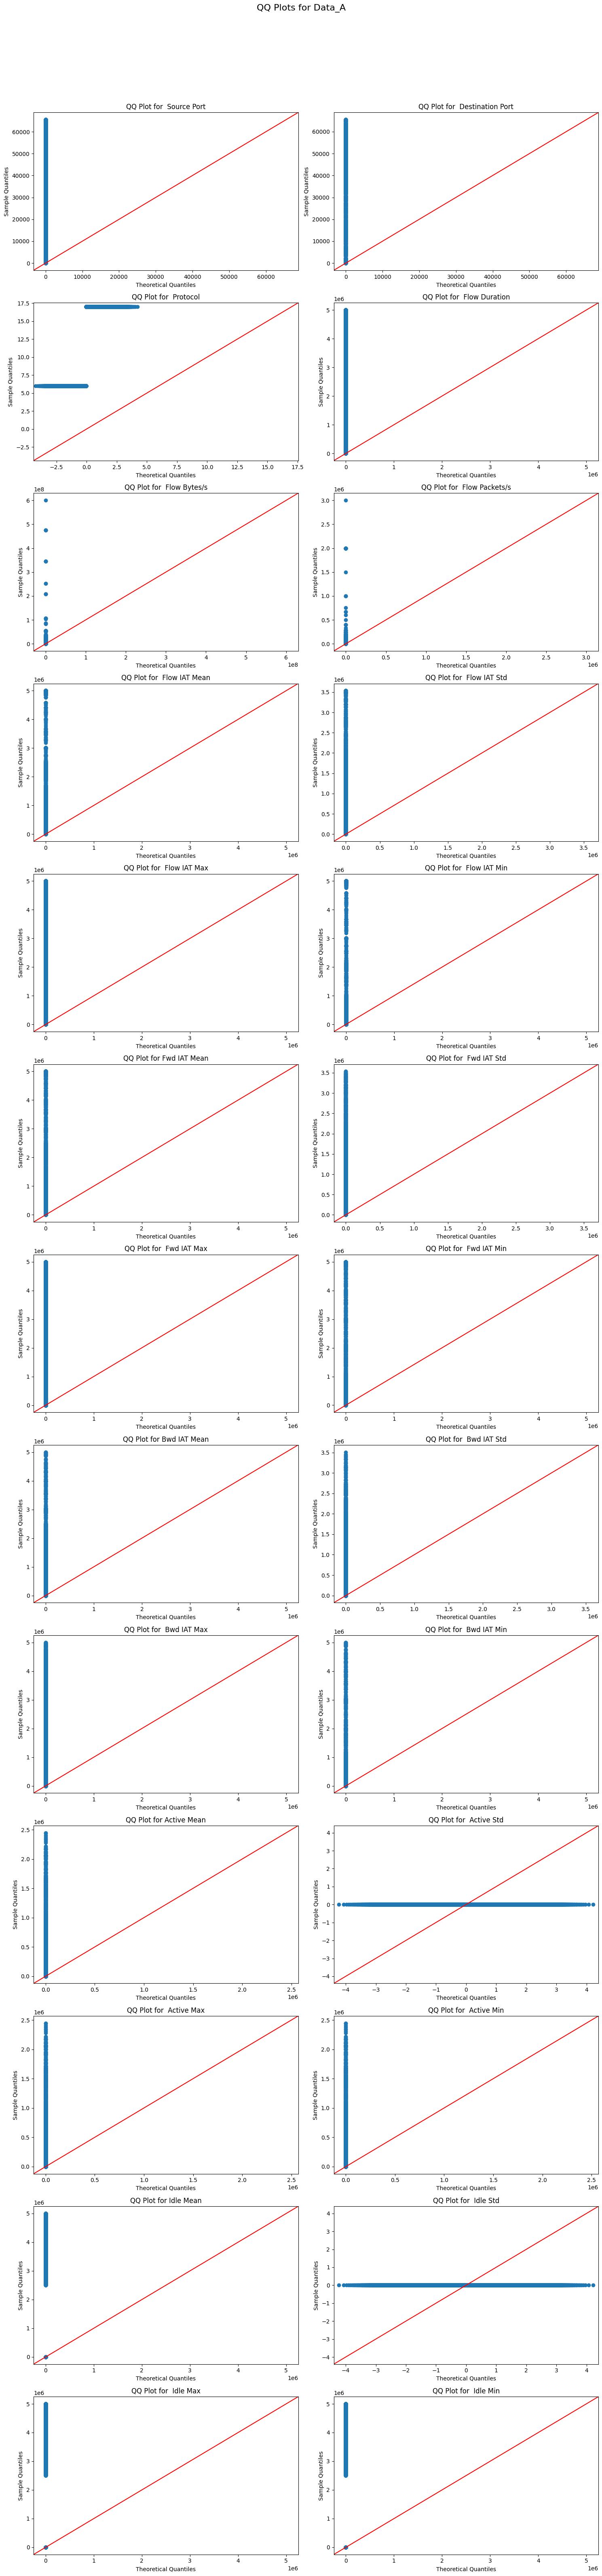

In [ ]:
def create_qqplots(data, title):
    num_cols = data.select_dtypes(include=np.number).columns
    num_plots = len(num_cols)
    cols = 2
    rows = (num_plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.ravel()

    for i, col in enumerate(num_cols):
        sm.qqplot(data[col], line='45', ax=axes[i])
        axes[i].set_title(f'QQ Plot for {col}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'QQ Plots for {title}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_qqplots(data_A, "Data_A")

normalisons les données min max scaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

numerical_cols = data_A.select_dtypes(include=np.number).columns.difference(['label'])

scaler = MinMaxScaler()
data_A[numerical_cols] = scaler.fit_transform(data_A[numerical_cols])

data_A.head()


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000087,0.0,0.001532,0.000087,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonTOR
1,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000052,0.0,0.002574,0.000052,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonTOR
2,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000178,0.0,0.000748,0.000178,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonTOR
3,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000215,0.0,0.000621,0.000215,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonTOR
4,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000063,0.0,0.002116,0.000063,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonTOR


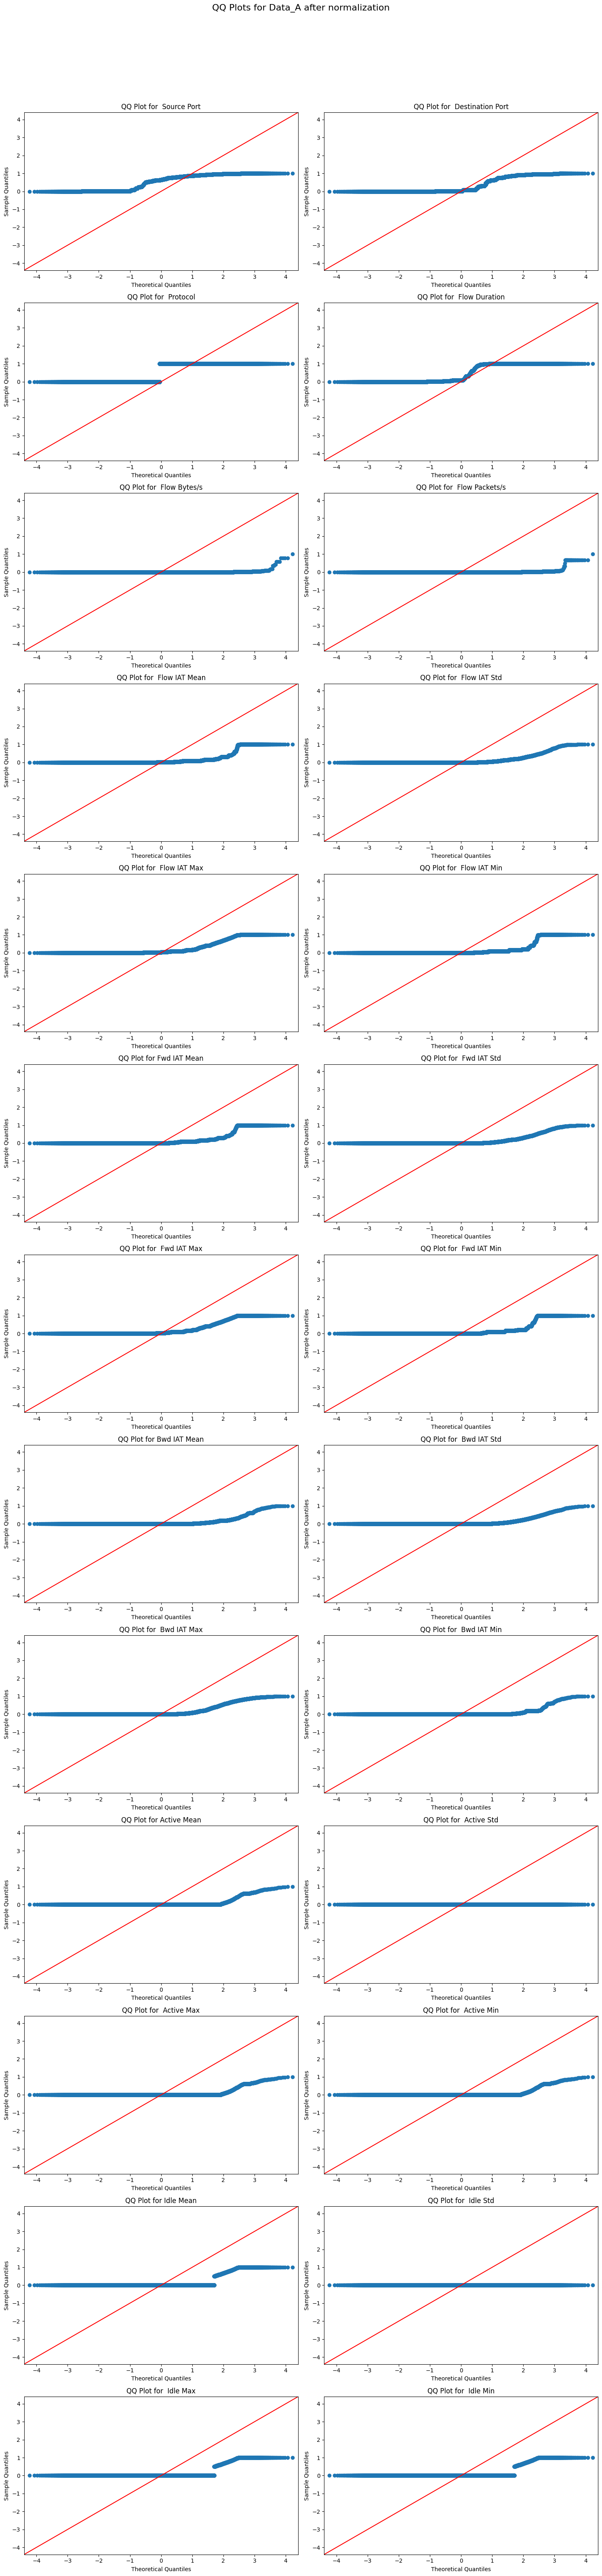

In [ ]:
create_qqplots(data_A, "Data_A after normalization")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
data_A['label']=data_A['label'].replace({'nonTOR': 0, 'TOR': 1})
data_A.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000087,0.0,0.001532,0.000087,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000052,0.0,0.002574,0.000052,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000178,0.0,0.000748,0.000178,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000215,0.0,0.000621,0.000215,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10.0.2.15,0.822615,216.58.208.46,0.000901,0.0,0.000063,0.0,0.002116,0.000063,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data_A["Source IP"].unique()

array(['10.0.2.15', '10.8.0.10', '10.8.0.14', '10.8.0.6', '10.8.8.110',
       '10.8.8.130', '10.8.8.134', '10.8.8.138', '10.8.8.178',
       '10.8.8.222', '10.8.8.234', '10.8.8.246', '105.237.177.132',
       '107.22.243.234', '108.162.232.203', '108.175.39.202',
       '108.175.42.181', '108.175.43.146', '108.237.134.2',
       '128.65.249.132', '129.98.43.99', '130.88.8.60', '131.202.240.150',
       '131.202.240.196', '131.202.240.242', '131.202.240.72',
       '131.202.240.87', '131.202.243.27', '131.202.244.3',
       '131.202.244.5', '131.202.6.26', '132.235.106.83',
       '134.170.18.175', '134.170.58.123', '137.116.224.167',
       '139.190.23.248', '141.219.235.176', '142.1.33.2',
       '144.118.64.164', '152.163.66.131', '157.56.109.8',
       '157.56.198.10', '157.56.96.123', '161.69.12.13',
       '166.171.250.171', '167.56.6.76', '173.194.113.112',
       '173.194.116.95', '173.194.121.0', '173.194.123.0',
       '173.194.123.1', '173.194.123.10', '173.194.123.101',
   

transformons les varibales catégorielles aux numériques avec le label encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_A['Source IP'] = label_encoder.fit_transform(data_A['Source IP'])
data_A[' Destination IP'] = label_encoder.fit_transform(data_A[' Destination IP'])
data_A[' Protocol'] = label_encoder.fit_transform(data_A[' Protocol'])
data_A.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,4,0.822615,869,0.000901,0,0.000087,0.0,0.001532,0.000087,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4,0.822615,869,0.000901,0,0.000052,0.0,0.002574,0.000052,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4,0.822615,869,0.000901,0,0.000178,0.0,0.000748,0.000178,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,0.822615,869,0.000901,0,0.000215,0.0,0.000621,0.000215,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.822615,869,0.000901,0,0.000063,0.0,0.002116,0.000063,0.0,...,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Model development

Random Forest

In [ ]:
X = data_A.drop('label', axis=1)
y = data_A['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9958826556870818
Precision: 0.9878300803673938
Recall: 0.9882839421088904
F1 Score: 0.9880569591180524


In [ ]:

try:
  roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo')
  print(f"ROC AUC Score: {roc_auc}")
except Exception as e:
  print(f"ROC AUC Score could not be calculated: {e}")

ROC AUC Score could not be calculated: y should be a 1d array, got an array of shape (25259, 2) instead.


In [ ]:
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1], multi_class='ovo')
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9928743923689003


Logitic regression

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression - Accuracy: {accuracy_logreg}")
print(f"Logistic Regression - Precision: {precision_logreg}")
print(f"Logistic Regression - Recall: {recall_logreg}")
print(f"Logistic Regression - F1 Score: {f1_logreg}")

try:
    roc_auc_logreg = roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
    print(f"Logistic Regression - ROC AUC Score: {roc_auc_logreg}")
except ValueError as e:
    print(f"Logistic Regression - ROC AUC Score could not be calculated: {e}")

Logistic Regression - Accuracy: 0.9202264539372105
Logistic Regression - Precision: 0.7812800769971127
Logistic Regression - Recall: 0.7459223524006432
Logistic Regression - F1 Score: 0.7631919144435304
Logistic Regression - ROC AUC Score: 0.951556065482879


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1 Score: {f1_knn}")

try:
    roc_auc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])
    print(f"KNN - ROC AUC Score: {roc_auc_knn}")
except ValueError as e:
    print(f"KNN - ROC AUC Score could not be calculated: {e}")

KNN - Accuracy: 0.9999604101508374
KNN - Precision: 0.9997703261368857
KNN - Recall: 1.0
KNN - F1 Score: 0.9998851498794074
KNN - ROC AUC Score: 0.9999760669382025




Naive Bayes Classifier


In [ ]:

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Precision: {precision_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - F1 Score: {f1_nb}")

try:
    roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
    print(f"Naive Bayes - ROC AUC Score: {roc_auc_nb}")
except ValueError as e:
    print(f"Naive Bayes - ROC AUC Score could not be calculated: {e}")

Naive Bayes - Accuracy: 0.7228710558612772
Naive Bayes - Precision: 0.3801503214706149
Naive Bayes - Recall: 0.9643923730760395
Naive Bayes - F1 Score: 0.5453364510262406
Naive Bayes - ROC AUC Score: 0.9273612344484271


Linear Discriminant Analysis

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

y_pred_lda = lda_classifier.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print(f"LDA - Accuracy: {accuracy_lda}")
print(f"LDA - Precision: {precision_lda}")
print(f"LDA - Recall: {recall_lda}")
print(f"LDA - F1 Score: {f1_lda}")

try:
    roc_auc_lda = roc_auc_score(y_test, lda_classifier.predict_proba(X_test)[:, 1])
    print(f"LDA - ROC AUC Score: {roc_auc_lda}")
except ValueError as e:
    print(f"LDA - ROC AUC Score could not be calculated: {e}")

LDA - Accuracy: 0.9229185636802724
LDA - Precision: 0.7924161400097229
LDA - Recall: 0.7489087985297496
LDA - F1 Score: 0.7700484232904217
LDA - ROC AUC Score: 0.9410062993181231


Quadratic Discriminant Analysis (QDA)

In [ ]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

y_pred_qda = qda_classifier.predict(X_test)

accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)
recall_qda = recall_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)

print(f"QDA - Accuracy: {accuracy_qda}")
print(f"QDA - Precision: {precision_qda}")
print(f"QDA - Recall: {recall_qda}")
print(f"QDA - F1 Score: {f1_qda}")

try:
    roc_auc_qda = roc_auc_score(y_test, qda_classifier.predict_proba(X_test)[:, 1])
    print(f"QDA - ROC AUC Score: {roc_auc_qda}")
except ValueError as e:
    print(f"QDA - ROC AUC Score could not be calculated: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - Accuracy: 0.8349103289916465
QDA - Precision: 0.5109332058788386
QDA - Recall: 0.9823110498506777
QDA - F1 Score: 0.6722213488445213
QDA - ROC AUC Score: 0.9392854044870953


Stochastic Gradient Descent (SGD)

Gradient Boosting Machines (GBM)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Accuracy: {accuracy_gb}")
print(f"Gradient Boosting - Precision: {precision_gb}")
print(f"Gradient Boosting - Recall: {recall_gb}")
print(f"Gradient Boosting - F1 Score: {f1_gb}")

try:
    roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
    print(f"Gradient Boosting - ROC AUC Score: {roc_auc_gb}")
except ValueError as e:
    print(f"Gradient Boosting - ROC AUC Score could not be calculated: {e}")

Gradient Boosting - Accuracy: 0.9996832812066986
Gradient Boosting - Precision: 0.9988518943742825
Gradient Boosting - Recall: 0.9993108201240524
Gradient Boosting - F1 Score: 0.9990813045475425
Gradient Boosting - ROC AUC Score: 0.9999987747766803


 Support Vector Machine (SVM)

In [ ]:

from sklearn.svm import SVC

svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm}")
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1 Score: {f1_svm}")

try:
    roc_auc_svm = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1])
    print(f"SVM - ROC AUC Score: {roc_auc_svm}")
except ValueError as e:
    print(f"SVM - ROC AUC Score could not be calculated: {e}")

SVM - Accuracy: 0.9720891563403143
SVM - Precision: 0.9051532652154598
SVM - Recall: 0.936135998162187
SVM - F1 Score: 0.9203839638622248
SVM - ROC AUC Score: 0.980883758085842


Artificial Neural Networks (ANN)

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"ANN - Loss: {loss}")
print(f"ANN - Accuracy: {accuracy}")

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(f"ANN - Precision: {precision}")
print(f"ANN - Recall: {recall}")
print(f"ANN - F1 Score: {f1}")
print(f"ANN - ROC AUC Score: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.5160 - val_accuracy: 0.9679 - val_loss: 0.0982
Epoch 2/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9376 - loss: 0.2060 - val_accuracy: 0.9718 - val_loss: 0.0742
Epoch 3/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1407 - val_accuracy: 0.9738 - val_loss: 0.0695
Epoch 4/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9691 - loss: 0.1010 - val_accuracy: 0.9632 - val_loss: 0.1291
Epoch 5/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0827 - val_accuracy: 0.9843 - val_loss: 0.0429
Epoch 6/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0821 - val_accuracy: 0.9841 - val_loss: 0.0295
Epoch 7/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9776 - loss: 0.0735 - val_accuracy: 0.9919 - val_loss: 0.0314
Epoch 8/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0740 - 

AdaBoost

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f"AdaBoost - Accuracy: {accuracy_ada}")
print(f"AdaBoost - Precision: {precision_ada}")
print(f"AdaBoost - Recall: {recall_ada}")
print(f"AdaBoost - F1 Score: {f1_ada}")

try:
    roc_auc_ada = roc_auc_score(y_test, ada_classifier.predict_proba(X_test)[:, 1])
    print(f"AdaBoost - ROC AUC Score: {roc_auc_ada}")
except ValueError as e:
    print(f"AdaBoost - ROC AUC Score could not be calculated: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.9994457421117225
AdaBoost - Precision: 0.9986210066651344
AdaBoost - Recall: 0.998162186997473
AdaBoost - F1 Score: 0.9983915441176471
AdaBoost - ROC AUC Score: 0.999996494652565


In [ ]:

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

y_pred_sgd = sgd_classifier.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

print(f"SGD - Accuracy: {accuracy_sgd}")
print(f"SGD - Precision: {precision_sgd}")
print(f"SGD - Recall: {recall_sgd}")
print(f"SGD - F1 Score: {f1_sgd}")

try:
    roc_auc_sgd = roc_auc_score(y_test, sgd_classifier.predict_proba(X_test)[:, 1])
    print(f"SGD - ROC AUC Score: {roc_auc_sgd}")
except ValueError as e:
    print(f"SGD - ROC AUC Score could not be calculated: {e}")

SGD - Accuracy: 0.8666613880201116
SGD - Precision: 0.7298180121325245
SGD - Recall: 0.3592924419940271
SGD - F1 Score: 0.4815270935960591


AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'